<a href="https://colab.research.google.com/github/ayman86/playground/blob/master/cov_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!wget https://figshare.com/ndownloader/files/3381290
#!unzip 3381290


In [2]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.utils.traceback_utils import include_frame


In [3]:
num_classes=3
image_size=227


In [ ]:
data_genarater=ImageDataGenerator(preprocessing_function=preprocess_input)

In [5]:
train  = '/content/drive/MyDrive/ddvdata/train'
test  = '/content/drive/MyDrive/ddvdata/test'
#Therd step resize
trdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
traindata = trdata.flow_from_directory(directory=train,target_size=(image_size,image_size))

tsdata = ImageDataGenerator(rescale= 1./255,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip= True,
)
testdata = tsdata.flow_from_directory(directory=test,target_size=(227,227))

input_shape = (227,227,3)

Found 10759 images belonging to 3 classes.
Found 2688 images belonging to 3 classes.


In [6]:
model=Sequential()
model.add(VGG16(include_top=False,pooling='avg',weights='imagenet'))


58900480/58889256 [==============================] - 0s 0us/step


In [7]:
model.add(Dense(num_classes,activation='softmax'))

In [8]:
model.layers[0].layers

In [9]:
model.layers[0].trainable=False
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
step_per_epoch_train=len(traindata)
step_per_epoch_vaild=len(testdata)
num_epoch=10


In [11]:
pach_size_train=64
pach_size_valid=64

hist = model.fit_generator(traindata,
                           steps_per_epoch = pach_size_train,
                           epochs = num_epoch,
                           validation_data = testdata,
                           validation_steps =pach_size_valid
                           )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
64/64 [==============================] - 1078s 17s/step - loss: 1.0553 - accuracy: 0.4878 - val_loss: 0.9547 - val_accuracy: 0.7446
Epoch 2/10
64/64 [==============================] - 493s 8s/step - loss: 0.8795 - accuracy: 0.7646 - val_loss: 0.8222 - val_accuracy: 0.7920
Epoch 3/10
64/64 [==============================] - 333s 5s/step - loss: 0.7701 - accuracy: 0.8077 - val_loss: 0.7270 - val_accuracy: 0.8242
Epoch 4/10
64/64 [==============================] - 256s 4s/step - loss: 0.6824 - accuracy: 0.8237 - val_loss: 0.6652 - val_accuracy: 0.8130
Epoch 5/10
64/64 [==============================] - 222s 3s/step - loss: 0.6291 - accuracy: 0.8398 - val_loss: 0.6181 - val_accuracy: 0.8223
Epoch 6/10
64/64 [==============================] - 185s 3s/step - loss: 0.5858 - accuracy: 0.8374 - val_loss: 0.5854 - val_accuracy: 0.8105
Epoch 7/10
64/64 [==============================] - 160s 3s/step - loss: 0.5530 - accuracy: 0.8394 - val_loss: 0.5433 - val_accuracy: 0.8398
Epoch 8/10


In [12]:
model.save('/content/drive/MyDrive/ddvdata/model_saved.h5')


In [13]:
model.save_spec('/content/drive/MyDrive/ddvdata/model_saved_1.h5')

([TensorSpec(shape=(None, None, None, 3), dtype=tf.float32, name='vgg16_input')],
 {})

In [14]:
model.save_weights('/content/drive/MyDrive/ddvdata/model_saved_2.h5')

In [ ]:
#from keras.models import load_model
#model = load_model('/content/drive/MyDrive/Mdvdata/model_saved.h5')

In [15]:
traindata = trdata.flow_from_directory(directory=train,target_size=(image_size,image_size),shuffle=False)


Found 10759 images belonging to 3 classes.


In [16]:
test_score=model.evaluate(testdata)


84/84 [==============================] - 38s 446ms/step - loss: 0.4811 - accuracy: 0.8464


In [17]:
import matplotlib.pyplot as plt


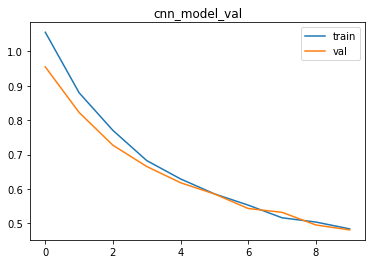

In [18]:
#plot
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'val')
plt.title('cnn_model_val')
plt.legend()
plt.show()

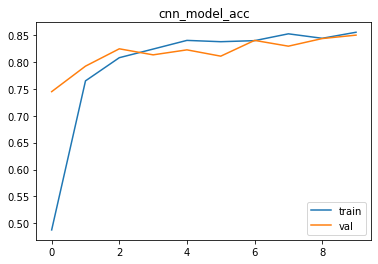

In [19]:
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'val')
plt.title('cnn_model_acc')
plt.legend()
plt.show()

In [20]:
#confusion matrix
import numpy as np
target = ['cov19','normal','pen']
label = [0,1,2]

Y_pred = model.predict_generator(testdata)
y_pred = np.argmax(Y_pred,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [21]:
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix,ConfusionMatrixDisplay

confusmatris
[[256 313 327]
 [315 291 290]
 [287 299 310]]
classification_report
              precision    recall  f1-score   support

       cov19       0.30      0.29      0.29       896
      normal       0.32      0.32      0.32       896
         pen       0.33      0.35      0.34       896

    accuracy                           0.32      2688
   macro avg       0.32      0.32      0.32      2688
weighted avg       0.32      0.32      0.32      2688



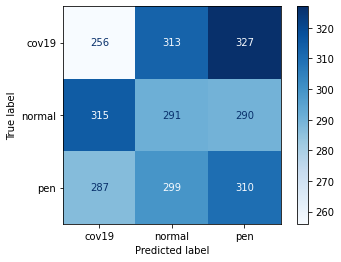

In [22]:
cm = confusion_matrix(testdata.classes,y_pred,labels=label)

print ('confusmatris')
print (confusion_matrix(testdata.classes,y_pred))

print ('classification_report')
print (classification_report(testdata.classes,y_pred, target_names = target))

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=target)
#disp = disp.plot(cmap = plt.cm.Blues,values_format='g')
disp = disp.plot(cmap = plt.cm.Blues,values_format='g')

plt.show()

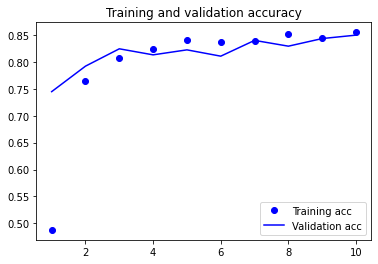

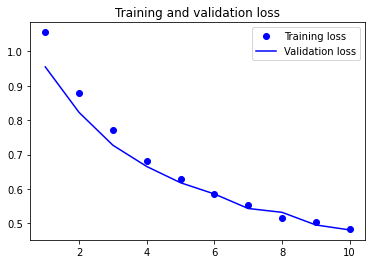

In [23]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()